# Zadanie 2: Przeuczenie i Niedouczenie sieci neuronowych

## Potrzebne importy i przygotowanie danych

In [1]:
import numpy as np
import keras
import pandas as pd
import tensorflow as tf
from keras import layers
from keras import models
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Wybrany przeze mnie zbiór danych to [Web Page Phishing](https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset). Zawiera ponad 100,000 rekordów informacji dotyczących linków, np. jego długość, ilość występowania konkretnych znaków czy informacje o przekierowaniu oraz etykietę - czy dany link jest phishingiem. Pracę zaczniemy od wczytania i sprawdzenia kompletności danych.

In [2]:
df = pd.read_csv('web-page-phishing.csv')
df.dtypes

url_length        int64
n_dots            int64
n_hypens          int64
n_underline       int64
n_slash           int64
n_questionmark    int64
n_equal           int64
n_at              int64
n_and             int64
n_exclamation     int64
n_space           int64
n_tilde           int64
n_comma           int64
n_plus            int64
n_asterisk        int64
n_hastag          int64
n_dollar          int64
n_percent         int64
n_redirection     int64
phishing          int64
dtype: object

In [3]:
df.isna().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

Przygotowanie danych do procesu uczenia

In [4]:
data = df.drop('phishing', axis=1)
labels = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15)

## Tworzenie modelu

### Wybór struktury sieci

In [5]:
def create_2_layer_model(n_units_l1=16, n_units_l2=8, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu'))
    model.add(layers.Dense(n_units_l2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def create_1_layer_model(n_units=16, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [6]:
model_8 = create_1_layer_model(8, name='model_8')
model_16 = create_1_layer_model(16, name='model_16')
model_32 = create_1_layer_model(32, name='model_32')
model_64 = create_1_layer_model(64, name='model_64')

model_8_4 = create_2_layer_model(8, 4, name='model_8-4')
model_16_8 = create_2_layer_model(16, 8, name='model_16-8')
model_32_16 = create_2_layer_model(32, 16, name='model_32-16')
model_64_32 = create_2_layer_model(64, 32, name='model_64-32')

In [7]:
models_1_layer = [model_8, model_16, model_32, model_64]
models_2_layers = [model_8_4, model_16_8, model_32_16, model_64_32]
histories_1_layer= []
histories_2_layers = []

n_epochs = 30

for model in models_1_layer:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=256, validation_data=(X_valid, y_valid))
    histories_1_layer.append(history)

for model in models_2_layers:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=256, validation_data=(X_valid, y_valid))
    histories_2_layers.append(history)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4872 - loss: 1.7354 - val_accuracy: 0.8403 - val_loss: 0.5160
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8455 - loss: 0.4884 - val_accuracy: 0.8459 - val_loss: 0.4362
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8498 - loss: 0.4208 - val_accuracy: 0.8472 - val_loss: 0.3970
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8500 - loss: 0.3887 - val_accuracy: 0.8514 - val_loss: 0.3775
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8508 - loss: 0.3722 - val_accuracy: 0.8515 - val_loss: 0.3654
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.3603 - val_accuracy: 0.8541 - val_loss: 0.3580
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8547 - loss: 0.3582 - val_accuracy: 0.8551 - val_loss: 0.3527
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8570 - loss: 0.3511 - val_accuracy: 

In [8]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)

def plot_accuracies(histories, title=None):
    plt.figure()
    colors = ['r', 'g', 'b', 'k', 'c', 'm', 'y', 'orange']
    if len(histories) > len(colors):
        raise ValueError('histories may contain at most 8 elements')
    epochs = range(1, len(histories[0].history['accuracy']))
    for i, history in enumerate(histories):
        plt.plot(epochs, history.history['accuracy'][1:], f'-{colors[i]}', label=f'train accuracy for {histories[i].model.name}')
        plt.plot(epochs, history.history['val_accuracy'][1:], f'--{colors[i]}', label=f'validation accuracy for {histories[i].model.name}')
    title = title if title else 'model accuracy'
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

def plot_losses(histories, title=None):
    plt.figure()
    colors = ['r', 'g', 'b', 'k', 'c', 'm', 'y', 'orange']
    if len(histories) > len(colors):
        raise ValueError('histories may contain at most 8 elements')
    epochs = range(1, len(histories[0].history['loss']))
    for i, history in enumerate(histories):
        plt.plot(epochs, history.history['loss'][1:], f'-{colors[i]}', label=f'train loss for {histories[i].model.name}')
        plt.plot(epochs, history.history['val_loss'][1:], f'--{colors[i]}', label=f'validation loss for {histories[i].model.name}')
    title = title if title else 'model loss'
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

def compare_accuracies(histories):
    for history in histories:
        print(f'{history.model.name} validation accuracy: {history.history["val_accuracy"][-1]}')
    max_accuracy = max([history.history['val_accuracy'][-1] for history in histories])
    for model in histories:
        if model.history['val_accuracy'][-1] == max_accuracy:
            print(f'max accuracy {max_accuracy} achieved by {model.model.name}\n')
            break

Porównanie modeli o różnych strukturach

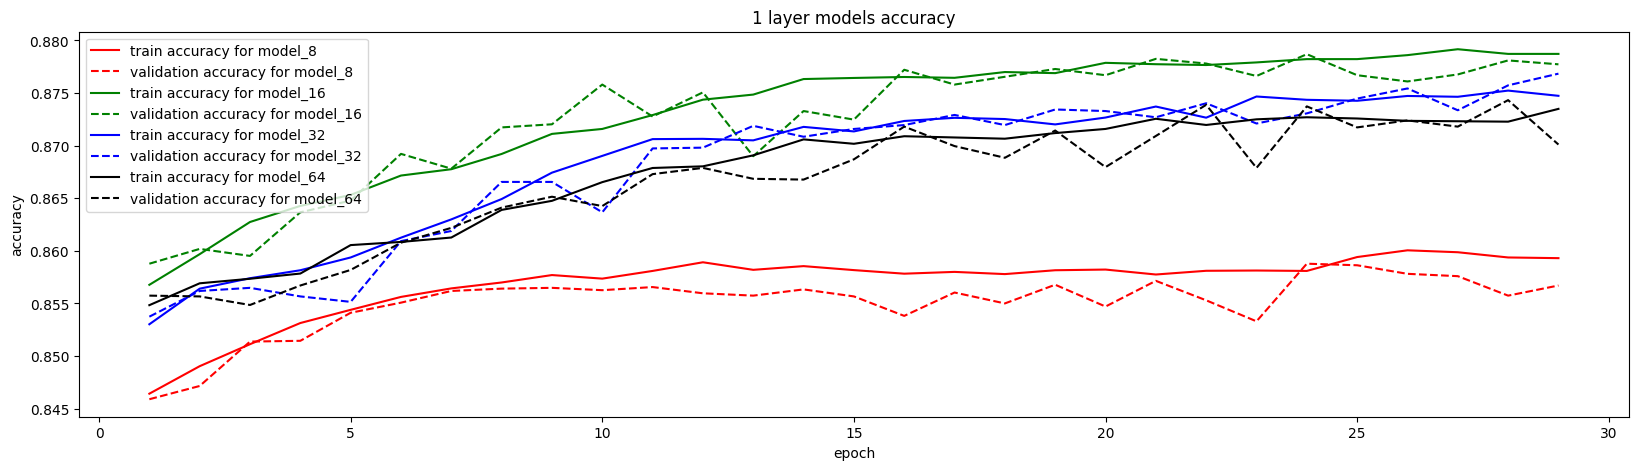

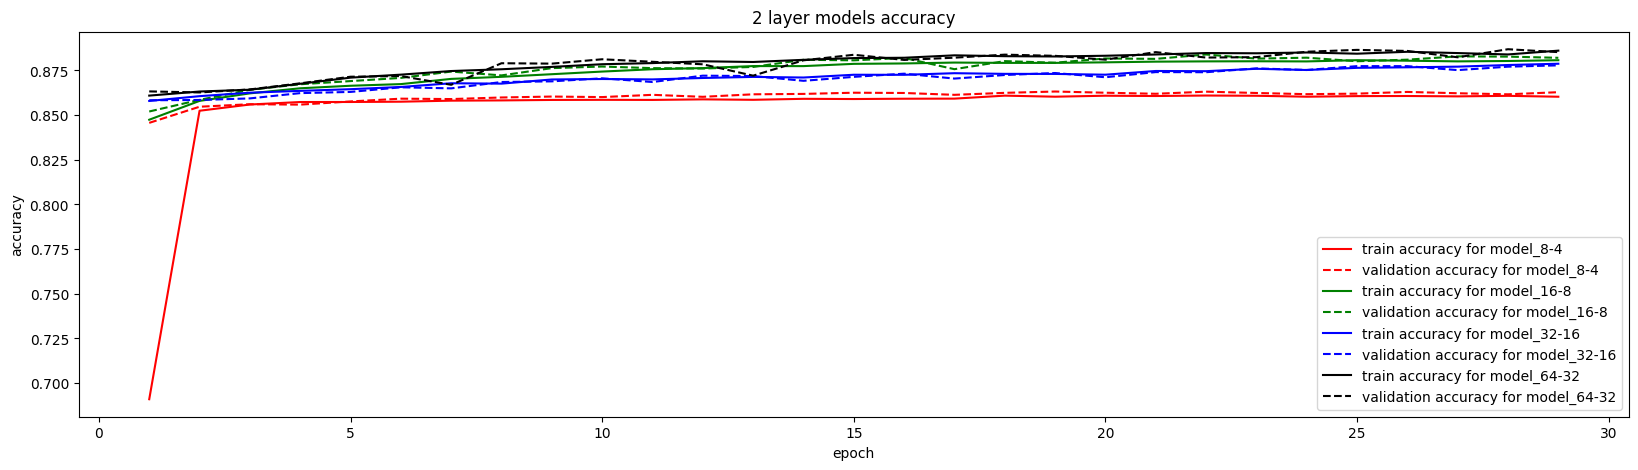

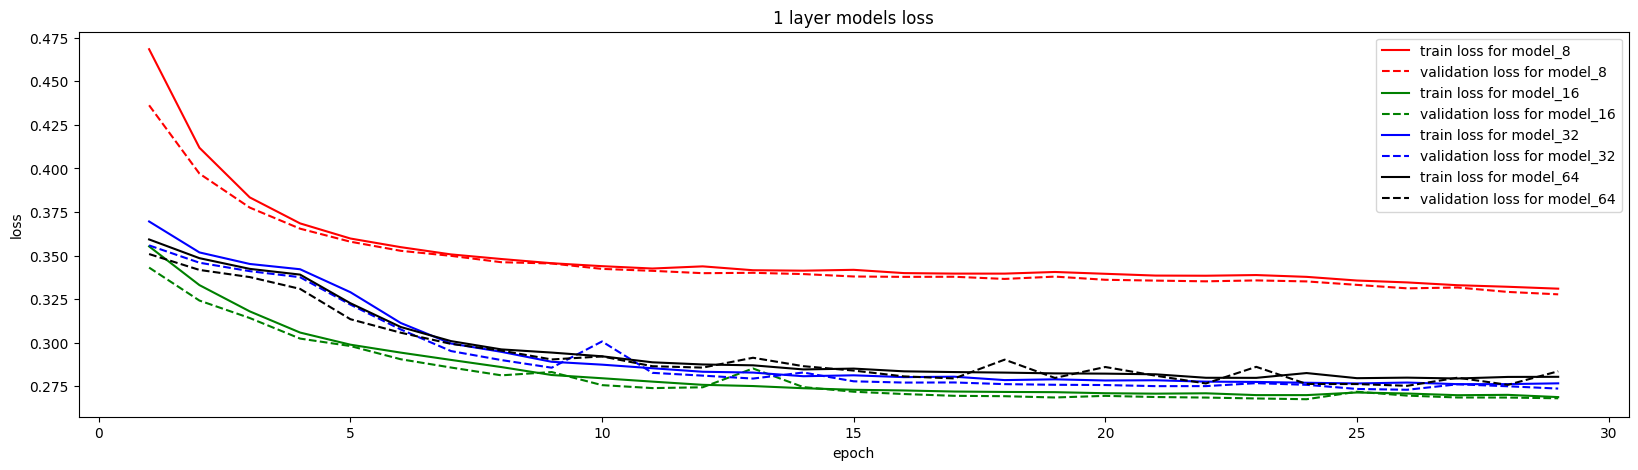

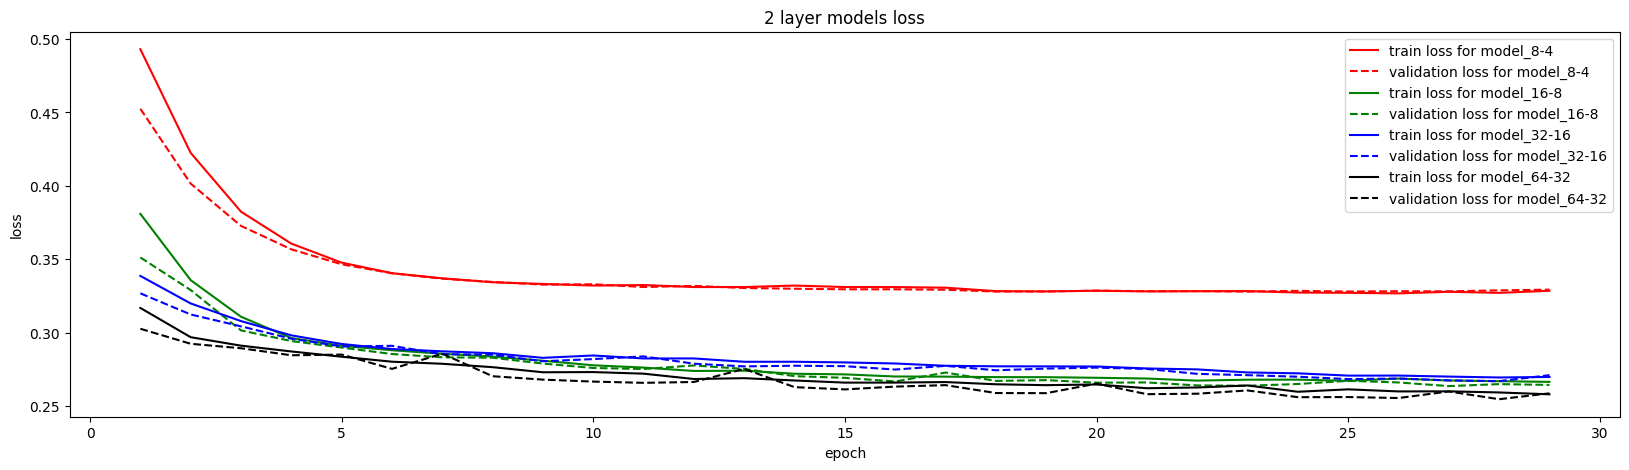

model_8 validation accuracy: 0.856709361076355
model_16 validation accuracy: 0.8777292370796204
model_32 validation accuracy: 0.8768410682678223
model_64 validation accuracy: 0.8701058626174927
max accuracy 0.8777292370796204 achieved by model_16

model_8-4 validation accuracy: 0.8628525137901306
model_16-8 validation accuracy: 0.8820960521697998
model_32-16 validation accuracy: 0.8778772950172424
model_64-32 validation accuracy: 0.8852786421775818
max accuracy 0.8852786421775818 achieved by model_64-32



In [9]:
plot_accuracies(histories_1_layer, title='1 layer models accuracy')
plot_accuracies(histories_2_layers, title='2 layer models accuracy')

plot_losses(histories_1_layer, title='1 layer models loss')
plot_losses(histories_2_layers, title='2 layer models loss')

compare_accuracies(histories_1_layer)
compare_accuracies(histories_2_layers)

Najbardziej skuteczny okazał sie model 64-32. Będziemy z niego korzystać w kolejnych etapach.

## Regularyzacja

Różnica między skutecznością na danych treningowych i walidacyjnych jest niewielka, sieć nie wykazuje przeuczenia. Sprobójmy jednak zbadać co się stanie jeżeli zastosujemy regularyzację.

### Regularyzacja wag

Wypróbójemy 3 sposoby regularyzacji wag: L1, L2 oraz L1 + L2.

In [10]:
def create_L1_model(n_units_l1=64, n_units_l2=32, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(n_units_l2, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def create_L2_model(n_units_l1=64, n_units_l2=32, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(n_units_l2, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def create_L1_L2_model(n_units_l1=64, n_units_l2=32, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
    model.add(layers.Dense(n_units_l2, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [11]:
model_l1 = create_L1_model(name='model_l1')
model_l2 = create_L2_model(name='model_l2')
model_l1_l2 = create_L1_L2_model(name='model_l1_l2')

In [12]:
regularized_models = [model_l1, model_l2, model_l1_l2]
histories_regularized = []

for model in regularized_models:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=256, validation_data=(X_valid, y_valid))
    histories_regularized.append(history)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7289 - loss: 1.0270 - val_accuracy: 0.8536 - val_loss: 0.4767
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8606 - loss: 0.4490 - val_accuracy: 0.8596 - val_loss: 0.4203
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8604 - loss: 0.4178 - val_accuracy: 0.8600 - val_loss: 0.4022
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8612 - loss: 0.3987 - val_accuracy: 0.8600 - val_loss: 0.3871
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8614 - loss: 0.3848 - val_accuracy: 0.8646 - val_loss: 0.3768
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8605 - loss: 0.3784 - val_accuracy: 0.8577 - val_loss: 0.3766
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3693 - val_accuracy: 0.8649 - val_loss: 0.3638
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8613 - loss: 0.3620 - val_accuracy: 0.

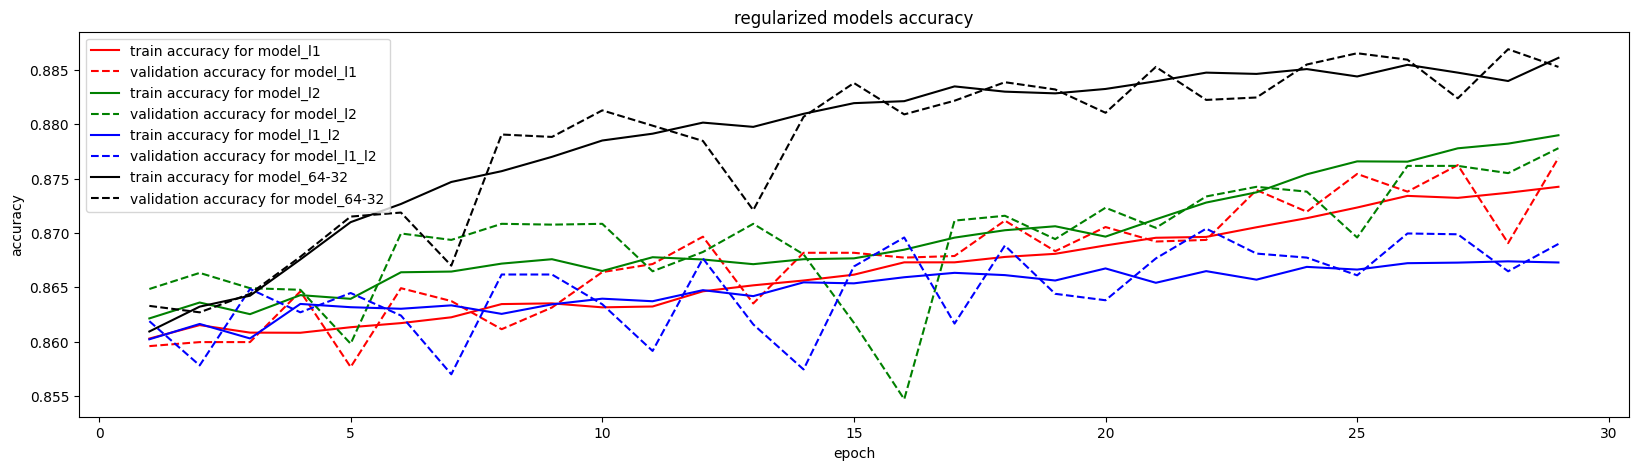

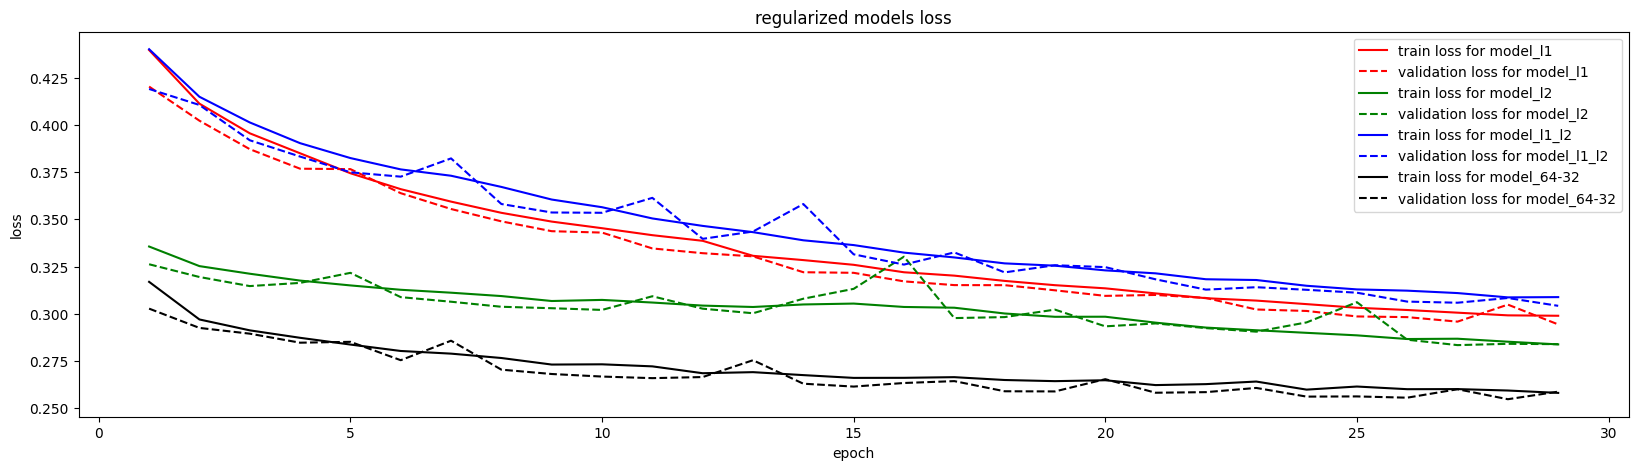

model_l1 validation accuracy: 0.8769150972366333
model_l2 validation accuracy: 0.8778032660484314
model_l1_l2 validation accuracy: 0.8689956068992615
model_64-32 validation accuracy: 0.8852786421775818
max accuracy 0.8852786421775818 achieved by model_64-32



In [13]:
histories_regularized_with_comparison = histories_regularized.copy()
histories_regularized_with_comparison.append(histories_2_layers[3])

plot_accuracies(histories_regularized_with_comparison, title='regularized models accuracy')

plot_losses(histories_regularized_with_comparison, title='regularized models loss')

compare_accuracies(histories_regularized_with_comparison)

Jak można było się spodziewać, ze względu na brak występowania przeuczenia, regularyzacja wag nie okazała się być korzystna dla naszego modelu. W kolejnym kroku będziemy korzystać z modelu bez tej regularyzacji.

### Dropout

In [14]:
def create_dropout_model(n_units_l1=64, n_units_l2=32, dropout=0.5, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(n_units_l2, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [15]:
model_dropout_10 = create_dropout_model(dropout=0.1, name='model_dropout_0.1')
model_dropout_20 = create_dropout_model(dropout=0.25, name='model_dropout_0.25')
model_dropout_50 = create_dropout_model(dropout=0.5, name='model_dropout_0.5')

In [16]:
dropout_models = [model_dropout_10, model_dropout_20, model_dropout_50]
histories_dropout = []

for model in dropout_models:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=256, validation_data=(X_valid, y_valid))
    histories_dropout.append(history)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6947 - loss: 0.6158 - val_accuracy: 0.8583 - val_loss: 0.3351
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8534 - loss: 0.3407 - val_accuracy: 0.8619 - val_loss: 0.3014
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3098 - val_accuracy: 0.8643 - val_loss: 0.2949
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8618 - loss: 0.3007 - val_accuracy: 0.8641 - val_loss: 0.2902
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8635 - loss: 0.2960 - val_accuracy: 0.8666 - val_loss: 0.2855
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - loss: 0.2935 - val_accuracy: 0.8696 - val_loss: 0.2826
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8676 - loss: 0.2896 - val_accuracy: 0.8690 - val_loss: 0.2805
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.2905 - val_accuracy: 0.

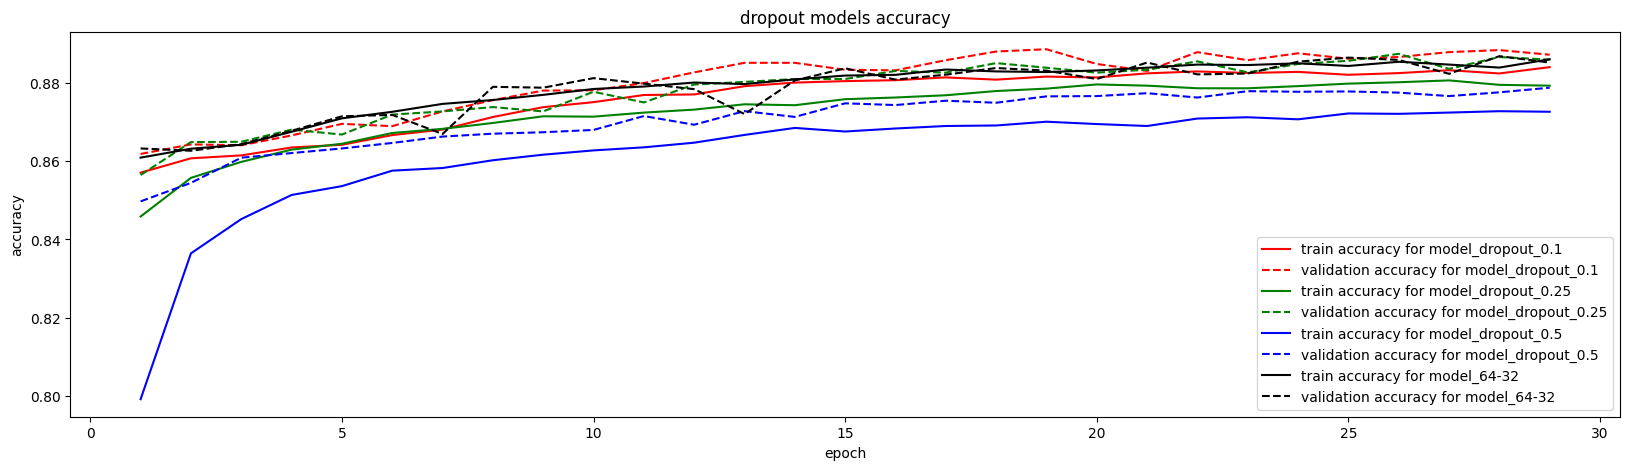

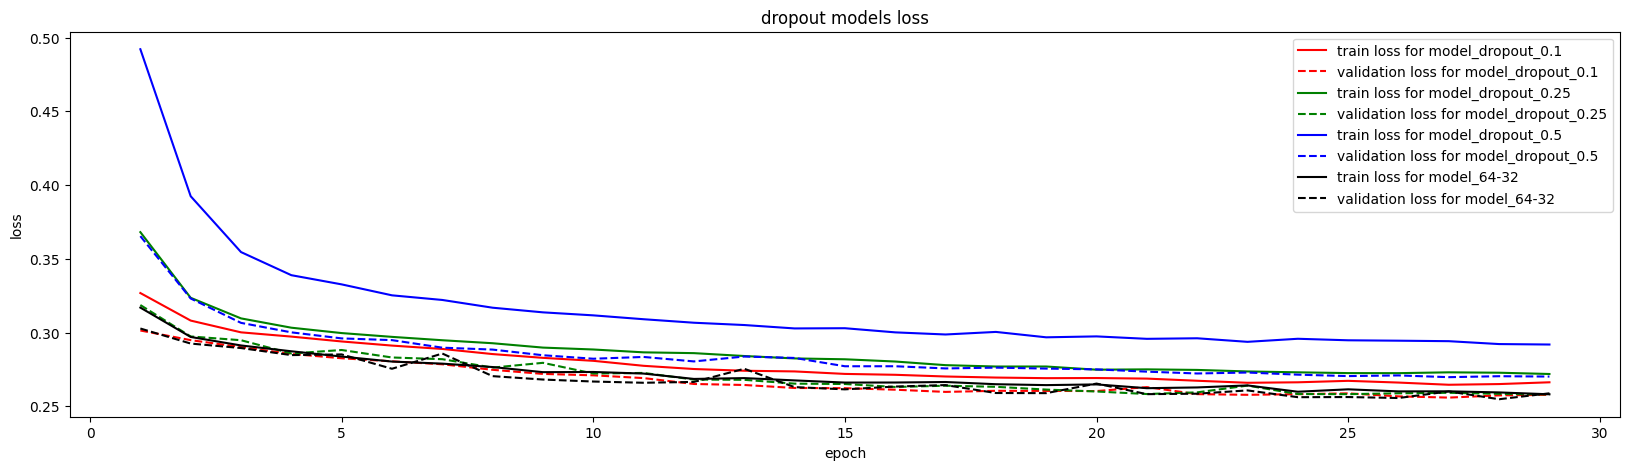

model_dropout_0.1 validation accuracy: 0.8872770071029663
model_dropout_0.25 validation accuracy: 0.8860188126564026
model_dropout_0.5 validation accuracy: 0.8788394927978516
model_64-32 validation accuracy: 0.8852786421775818
max accuracy 0.8872770071029663 achieved by model_dropout_0.1



In [17]:
histories_dropout_with_comparison = histories_dropout.copy()
histories_dropout_with_comparison.append(histories_2_layers[3])

plot_accuracies(histories_dropout_with_comparison, title='dropout models accuracy')

plot_losses(histories_dropout_with_comparison, title='dropout models loss')

compare_accuracies(histories_dropout_with_comparison)

Modele z niewielkim dropoutem (0.1 i 0.25) wykazują podobną skuteczność co sieć bez regularyzacji.

## Wnioski

W naszym przypadku regularyzacja nie przyczyniła się do poprawienia rezultatów sieci. Powodem jest brak przeuczenia. Być może gdyby zastosowany model był bardziej skomplikowany (większa ilość warstw/więcej jednostek w warstwach) lub dłużej uczyli model, regularyzacja przyniosłaby lepsze wyniki.

Podczas pracy z tym notebookiem nauczyłem się: 
- jak radzić sobie z przeuczeniem/niedouczeniem w sieciach neuronowych
- wpływie regularyzacji na wydajność sieci
- sposobach przeprowadzania regularyzacji: regularyzacja wag i dropout